# Ordinary differential equations

Let’s consider a simple 1st order equation: 

$\frac{dy}{dx}=f(x,y)$

To solve this equation with a computer we need to **discretize** the differences: we
have to convert the differential equation into a “**finite differences**” equation. The simplest
solution is Euler’s method.

## Euler’s method

Supouse that at a point $x_0$, the function $f$ has a value $y_0$. We
want to find the approximate value of $y$ in a point $x_1$ close to
$x_0$, $x_1=x_0+\Delta x$, with $\Delta x$ small. We assume that $f$,
the rate of change of $y$, is constant in this interval $\Delta x$.
Therefore we find: 

$dx \approx \Delta x =x_1-x_0\\$
$dy \approx \Delta y =y_1-y_0$
 
with $y_1=y(x_1)=y(x_0+\Delta x)$. Then we re-write the differential equation in terms of discrete differences as:

$\frac{\Delta y}{\Delta x}=f(x,y)$ 

or 

$\Delta y = f(x,y)\Delta x$

and approximate the value of $y_1$ as
$y_1=y_0+f(x_0,y_0)(x_1-x_0)$.

We can generalize this formula to find
the value of $y$ at $x_2=x_1+\Delta x$ as

$y_{2}=y_1+f(x_1,y_1)\Delta x,$ 

or in the general case:

$y_{n+1}=y_n+f(x_n,y_n)\Delta x$

This is a good approximation as long as $\Delta x$ is “small”. What is
small? Depends on the problem, but it is basically defined by the “rate
of change”, or “smoothness” of $f$. $f(x)$ has to behave smoothly and
without rapid variations in the interval $\Delta x$.

Notice that Euler’s method is equivalent to a 1st order Taylor expansion
about the point $x_0$. 

### Exercise 1.1: Newton’s law of cooling 

If the temperature difference between an object and its surroundings is
small, the rate of change of the temperature of the object is
proportional to the temperature difference: $\frac{dT}{dt}=-r(T-T_s),$
where $T$ is the temperature of the body, $T_s$ is the temperature of
the environment, and $r$ is a “cooling constant” that depends on the
heat transfer mechanism, the contact area with the environment and the
thermal properties of the body. The minus sign appears because if
$T>T_s$, the temperature must decrease.

Write a program to calculate the temperature of a body at a time $t$,
given the cooling constant $r$ and the temperature of the body at time
$t=0$. Plot the results for $r=0.1\frac{1}{min}$; $T_s=83^{\circ} C$, $T_0=10^{\circ}$
using different intervals $\Delta t$ and compare with exact (analytical)
results.

In [14]:
T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = 0.05  # time step
tmax = 60. # maximum time
nsteps = int(tmax/dt)  # number of steps

In [15]:
T = T0
my_temp, my_time = [], [] # store temps and times
for i in range(1,nsteps+1):
    new_T = T - r*(T-Ts)*dt
    T = new_T
    my_time.append(i*dt)
    my_temp.append(T)
    if i%100 == 0: print ('{:20.18f}  {:20.18f}  {:20.18f}'.format(i,i*dt, T))
    # we can also do T = T - r*(T-Ts)*dt
    

100.000000000000000000  5.000000000000000000  38.778758136176847415
200.000000000000000000  10.000000000000000000  56.212079013989772136
300.000000000000000000  15.000000000000000000  66.772669411625400926
400.000000000000000000  20.000000000000000000  73.169962866400993562
500.000000000000000000  25.000000000000000000  77.045254114859673678
600.000000000000000000  30.000000000000000000  79.392790985967252482
700.000000000000000000  35.000000000000000000  80.814859421056084443
800.000000000000000000  40.000000000000000000  81.676306437699537355
900.000000000000000000  45.000000000000000000  82.198145572985325202
1000.000000000000000000  50.000000000000000000  82.514260293745351760
1100.000000000000000000  55.000000000000000000  82.705753246121219036
1200.000000000000000000  60.000000000000000000  82.821754015466851229


Let's try plotting the results. We first need to import the required libraries and methods

In [40]:
import numpy as np
from matplotlib import pyplot as plt

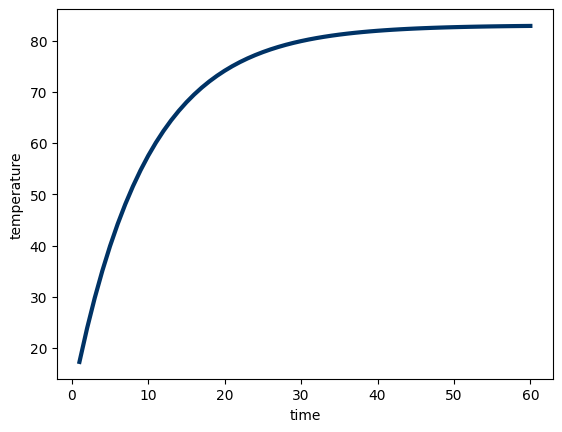

In [41]:
plt.plot(my_time, my_temp, color='#003366', ls='-', lw=3)
plt.xlabel('time')
plt.ylabel('temperature');

Alternatively, and in order to re use code in future problems, we could have created a function.

In [42]:
def euler(y, f, dx):
    """Computes y_new = y + f*dx
    
    Parameters
    ----------
    y  : float
        old value of y_n at x_n
    f  : float
        first derivative f(x,y) evaluated at (x_n,y_n)
    dx : float
        x step
    """
    
    return y + f*dx

In [43]:
T = T0
for i in range(1,nsteps):
    T = euler(T, -r*(T-Ts), dt)
    my_temp[i] = T


Actually, for this particularly simple case, calling a function may introduce unecessary overhead, but it is a an example that we will find useful for future applications. For a simple function like this we could have used a "lambda" function (more about lambda functions <a href="http://www.secnetix.de/olli/Python/lambda_functions.hawk">here</a>).

In [44]:
euler = lambda y, f, dx: y + f*dx 

Now, let's study the effects of different time steps $dt$ on the convergence. We expect that as $dt$ gets small, the result gets better and better but it's slower and slower

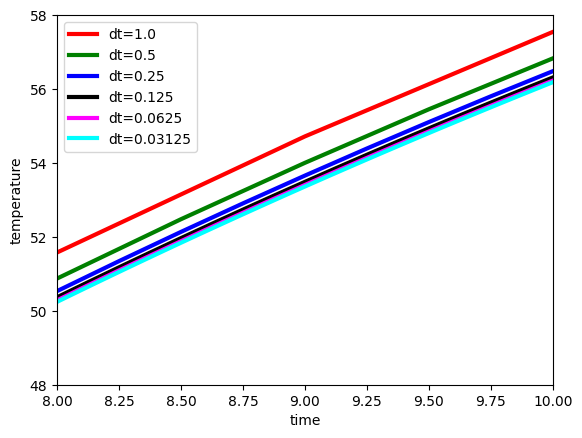

In [45]:
dt = 1.
my_color = ['red', 'green', 'blue', 'black', 'magenta', 'cyan']
for j in range(0,6):
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) 
    my_temp = np.zeros(nsteps)
    T = T0
    for i in range(0,nsteps):
        T = euler(T, -r*(T-Ts), dt)
        my_temp[i] = T
        
    plt.plot(my_time, my_temp, color=my_color[j], ls='-', lw=3, label="dt="+str(dt))
    dt = dt/2.

plt.xlabel('time');
plt.ylabel('temperature');
plt.legend()
plt.xlim(8,10)
plt.ylim(48,58);

We see that the gap between the result gets smaller and smaller as $dt$ gets smaller and smaller. This problem is too simple to see the effect of $dt$ on computation time.

But on theoretical grounds, how does computation time scale?

### Challenge 1.1

To properly study convergence, one possibility it so look at the result at a given time, for different time steps. Modify the previous program to print the temperature at $t=10$ as a function of $\Delta t$. 

In [58]:
dt = 1.
my_color = ['red', 'green', 'blue', 'black', 'magenta', 'cyan']
dts, temp_at_t10s = [], []
for j in range(0,15):
    dts.append(dt)
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) 
    my_temp = np.zeros(nsteps)
    T = T0
    for i in range(0,nsteps):
        T = euler(T, -r*(T-Ts), dt)
        my_temp[i] = T
        
    t10_idx = np.where(my_time==10.)[0][0]
    temp_at_t10s.append(my_temp[t10_idx])

    dt = dt / 2

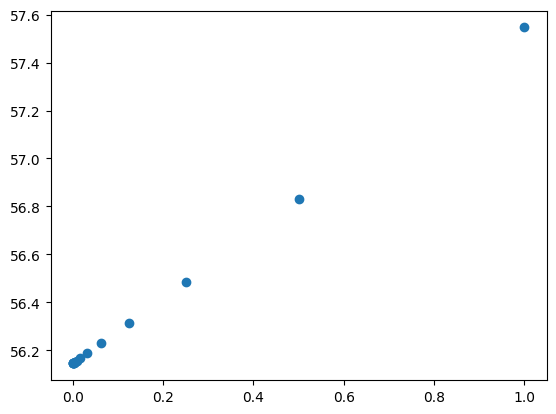

In [60]:
plt.scatter(dts, temp_at_t10s)

This shows explicit convergence to a fixed value. We'd also like to see the temperature differents

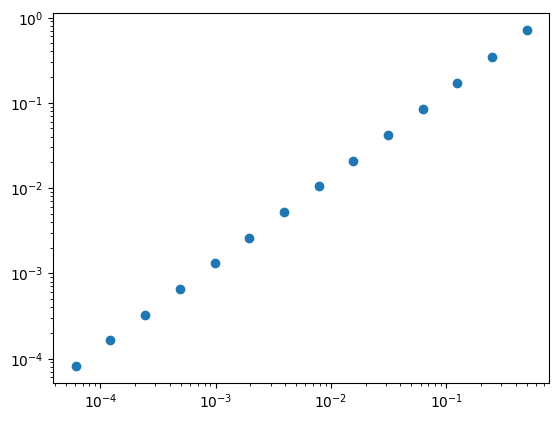

In [65]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(dts[1:], [abs(temp_at_t10s[i] - temp_at_t10s[i-1]) for i in range(1, len(dts))])

Such a beautiful line on a log-log scale tells us that the temperature difference for different dts scales as a power law. Let's find out what the exponent is by fitting a line to the data.

In [66]:
# fit line to data
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(func, np.log(dts[1:]), np.log([abs(temp_at_t10s[i] - temp_at_t10s[i-1]) for i in range(1, len(dts))]))

In [67]:
popt

array([1.004452  , 0.32696688])

The slope being $1$ tells us the power law.